In [1]:
%pip install -Uq pandas numpy matplotlib plotly seaborn


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import pandas as pd
import numpy as np

%matplotlib inline

In [10]:
data = pd.read_csv('base_data_preproc.csv')
data.head()

Unnamed: 0  children  days_employed  dob_years education  education_id  \
0           0         1   -8437.673028         42    высшее             0   
1           1         1   -4024.803754         36   среднее             1   
2           2         0   -5623.422610         33   Среднее             1   
3           3         3   -4124.747207         32   среднее             1   
4           4         0  340266.072047         53   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0      M   сотрудник     0  145885.952297   
3   женат / замужем                 0      M   сотрудник     0  267628.550329   
4  гражданский брак                 1      F   пенсионер     0  158616.077870   

                      purpose  
0               покупка жилья  
1     приобретение автомобиля  
2               покупка жилья  
3  дополнительное образование  
4             сыграть свадьбу

In [13]:
data = data.drop('Unnamed: 0', axis='columns')
data.head()

KeyError: "['Unnamed: 0'] not found in axis"

In [14]:
data.head()

children  days_employed  dob_years education  education_id  \
0         1   -8437.673028         42    высшее             0   
1         1   -4024.803754         36   среднее             1   
2         0   -5623.422610         33   Среднее             1   
3         3   -4124.747207         32   среднее             1   
4         0  340266.072047         53   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0      M   сотрудник     0  145885.952297   
3   женат / замужем                 0      M   сотрудник     0  267628.550329   
4  гражданский брак                 1      F   пенсионер     0  158616.077870   

                      purpose  
0               покупка жилья  
1     приобретение автомобиля  
2               покупка жилья  
3  дополнительное образование  
4             сыграть свадьбу

In [23]:
%%time
data.days_employed = abs(data.days_employed)
data.head()

CPU times: user 534 µs, sys: 145 µs, total: 679 µs
Wall time: 604 µs


children  days_employed  dob_years education  education_id  \
0         1    8437.673028         42    высшее             0   
1         1    4024.803754         36   среднее             1   
2         0    5623.422610         33   Среднее             1   
3         3    4124.747207         32   среднее             1   
4         0  340266.072047         53   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0      M   сотрудник     0  145885.952297   
3   женат / замужем                 0      M   сотрудник     0  267628.550329   
4  гражданский брак                 1      F   пенсионер     0  158616.077870   

                      purpose  
0               покупка жилья  
1     приобретение автомобиля  
2               покупка жилья  
3  дополнительное образование  
4             сыграть свадьбу

In [24]:
data.dob_years.describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [25]:
data.total_income.describe()

count    1.935100e+04
mean     1.674223e+05
std      1.029716e+05
min      2.066726e+04
25%      1.030532e+05
50%      1.450179e+05
75%      2.034351e+05
max      2.265604e+06
Name: total_income, dtype: float64

In [32]:
fig = px.scatter(
    data, 
    y='total_income', x=data.index,
    color='gender',
    opacity=.7
)
fig.show()

In [35]:
fig = px.scatter(
    data, 
    y='total_income', x=data.index,
    color='education_id',
    opacity=.7
)
fig.show()

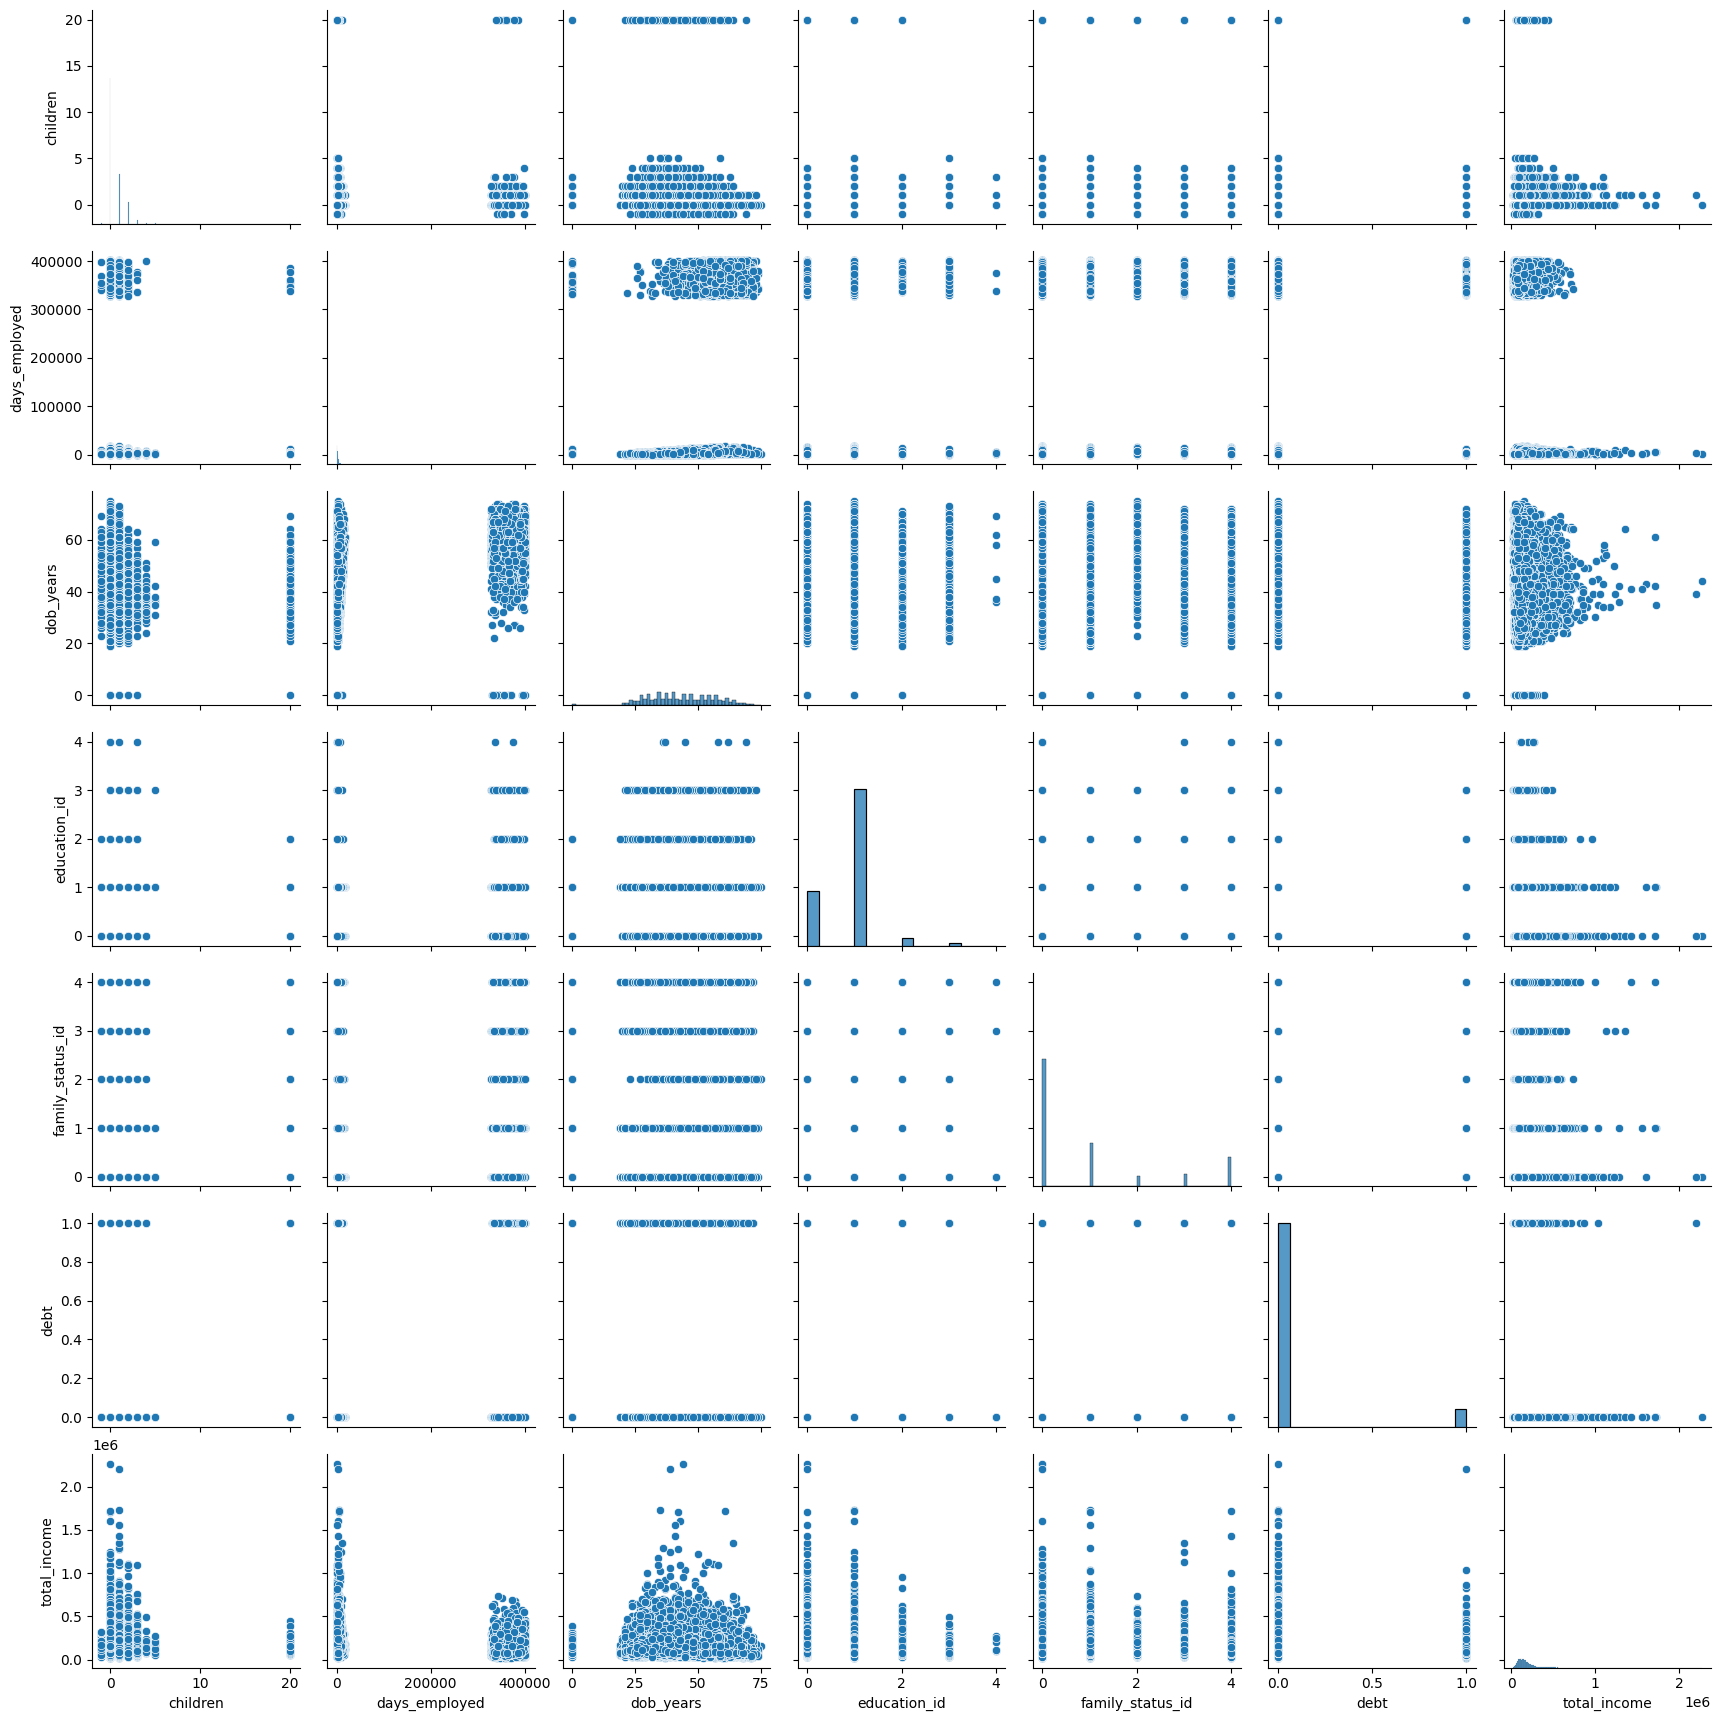

In [37]:
sns.pairplot(data)
plt.show()

In [51]:
px.histogram(
    data, 
    y='dob_years', x='total_income', 
    color='education',
    marginal='box'    
)

In [50]:
data[data.education_id == 3]

children  days_employed  dob_years  education  education_id  \
31            0    1682.083438         47  начальное             3   
136           0  357880.159379         60  начальное             3   
210           2  342167.212112         55  начальное             3   
211           0     577.273434         41  начальное             3   
272           0    5538.963731         35  начальное             3   
...         ...            ...        ...        ...           ...   
21104         0  367538.444192         47  начальное             3   
21170         2     181.613008         38  начальное             3   
21307         0  399682.284682         63  начальное             3   
21452         1     485.620542         46  начальное             3   
21483         2    2917.035232         38  начальное             3   

               family_status  family_status_id gender income_type  debt  \
31           женат / замужем                 0      F   сотрудник     0   
136          женат / замужем                 0      M   пенсионер     0   
210           вдовец / вдова                 2      F   пенсионер     0   
211         гражданский брак                 1      F   сотрудник     0   
272         гражданский брак                 1      M   сотрудник     1   
...                      ...               ...    ...         ...   ...   
21104       гражданский брак                 1      F   пенсионер     0   
21170        женат / замужем                 0      M   сотрудник     0   
21307  Не женат / не замужем                 4      M   пенсионер     0   
21452       гражданский брак                 1      F   сотрудник     0   
21483       гражданский брак                 1      F   сотрудник     1   

        total_income                                 purpose  
31     275485.684538                                   жилье  
136    113124.202781         операции со своей недвижимостью  
210    160635.120347        строительство жилой недвижимости  
211     36649.078439        сделка с подержанным автомобилем  
272    123814.079468                   заняться образованием  
...              ...                                     ...  
21104   60057.489557            на покупку своего автомобиля  
21170  175649.780503       покупка коммерческой недвижимости  
21307  117339.352662  строительство собственной недвижимости  
21452  191738.356107           получение высшего образования  
21483   77417.560520                операции с недвижимостью  

[282 rows x 12 columns]

In [52]:
data.education = data.education.str.lower()
data.education.unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [53]:
px.histogram(
    data, 
    y='dob_years', x='total_income', 
    color='education',
    marginal='box'    
)